# Import Libraries

# Read images and then use Canny Edge Detection

Text(0.5, 1.0, 'Canny detector')

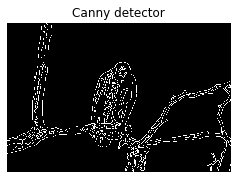

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import canny
from PIL import Image
from pylab import *
img = cv2.imread('/content/drive/My Drive/dataset/image/42049.jpg', cv2.IMREAD_GRAYSCALE)
out=cv2.imread('/content/drive/My Drive/dataset/ground-truth/42049.png',cv2.IMREAD_GRAYSCALE)

arr = np.asarray(img)

rows, columns = np.shape(arr)

edges = canny(img/255.)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(edges, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('Canny detector')

# Applying Threshold and filling holes

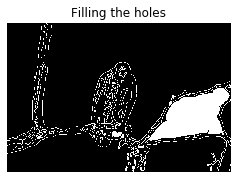

In [0]:
from scipy import ndimage as ndi
_, mask = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

fill_coins = ndi.binary_fill_holes(edges)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(fill_coins, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('Filling the holes')
plt.gray()

# Applying morphological operations

Text(0.5, 1.0, 'Removing small objects')

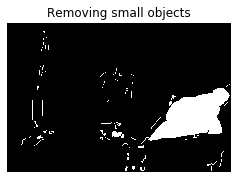

In [0]:
from skimage import morphology
coins_cleaned = morphology.remove_small_objects(fill_coins, 21)

fig, ax = plt.subplots(figsize=(4, 3))
ax.imshow(coins_cleaned, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('Removing small objects')

# Getting result again using thresholding

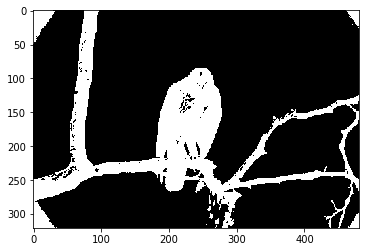

In [0]:
result=np.zeros((rows,columns))
for i in range(rows):
    for j in range(columns):
        # 0 for black and 255 for white
        if mask[i][j] > 125:
            result[i][j] = int(1)

        else:
            result[i][j] = int(0)
plt.imshow(result)

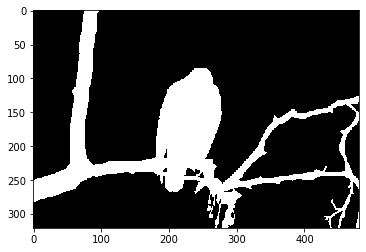

In [0]:
arr_out = np.asarray(out)
ground_out = np.zeros((rows, columns))

for i in range(rows):
    for j in range(columns):
        # 0 for white and 1 for black
        if arr_out[i][j] > 125:
            ground_out[i][j] = int(1)

        else:
            ground_out[i][j] = int(0)
plt.imshow(ground_out)

# Calculating Precision, Recall, F1 Scores and IOU scores

In [0]:
tp = 0
tn = 0
fn = 0
fp = 0

for i in range(rows):
    for j in range(columns):
        if ground_out[i][j] == 1 and result[i][j] == 1:
            tp = tp + 1
        if ground_out[i][j] == 0 and result[i][j] == 0:
            tn = tn + 1
        if ground_out[i][j] == 1 and result[i][j] == 0:
            fn = fn + 1
        if ground_out[i][j] == 0 and result[i][j] == 1:
            fp = fp + 1
''' ********************************** Calculation of Tpr, Fpr, F-Score, IoU ***************************************************'''

print('\n************Calculation of Tpr, Fpr, F-Score, IoU ********************')

# TP rate = TP/TP+FN
tpr = float(tp) / (tp + fn)
print("\nTPR is:", tpr)

# fp rate is
fpr = float(fp) / (fp + tn)
print("\nFPR is:", fpr)

pr = (float)(tp) / (tp + fp)
print('\n Precision:', pr)

rec = (float)(tp) / (tp + fn)
print('\n Recall:', rec)

f1 = (float)(2 * pr * rec) / (rec + pr)
print('\n F1 Score:', f1)

iou = (float)(tp) / (tp + fp + fn)
print("\nIoU Score:", iou)


************Calculation of Tpr, Fpr, F-Score, IoU ********************

TPR is: 0.9214220785779215

FPR is: 0.018733259555085084

 Precision: 0.9213600403972395

 Recall: 0.9214220785779215

 F1 Score: 0.9213910584433074

IoU Score: 0.8542401448234964
